In [203]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Extract Radon Data and do EDA

In [204]:
df = pd.read_csv('../data/radon.csv')

In [282]:
df[['log_radon', 'county', 'floor']].head(8)

,log_radon,county,floor
0,0.832909,AITKIN,1.0
1,0.832909,AITKIN,0.0
2,1.098612,AITKIN,0.0
3,0.095310,AITKIN,0.0
4,1.163151,ANOKA,0.0
5,0.955511,ANOKA,0.0
6,0.470004,ANOKA,0.0
7,0.095310,ANOKA,0.0


In [294]:
df[['idnum', 'county']].groupby('county').count().head(10)

,idnum
county,
AITKIN,4
ANOKA,52
BECKER,3
BELTRAMI,7
BENTON,4
BIG STONE,3
BLUE EARTH,14
BROWN,4
CARLTON,10


In [295]:
y = df['log_radon']
X = df[['floor']]
clusters = df['county']
X.loc['constant'] = 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [243]:
def plot_county_data(X_county, y_county):
    dither_delta = 0.05
    dither = dither_delta * np.random.rand(len(y_county)) - dither_delta/2.
    plt.plot(X_county['floor'] + dither, y_county, 'ko', alpha=0.5)

In [236]:
counties_to_plot = ['LAC QUI PARLE', 'AITKIN', 'KOOCHICHING', 'DOUGLAS', 'CLAY', 'STEARNS', 'RAMSEY', 'ST LOUIS']

# Complete Pooled Linear Regression
Fit a single linear model for all the data. 

In [244]:
def plot_county_lm(lm, county_name, linestyle='b-', linewidth=3):
    # Create the line
    xx = np.linspace(0, 1, 100)
    yy = lm.intercept_ + lm.coef_[0] * xx
    plt.plot(xx, yy, linestyle, linewidth=linewidth)
    plt.ylim([-1, 3])
    plt.title(county_name)
    plt.grid(True)

In [272]:
global_lm = LinearRegression()
global_lm.fit(X[['floor']], y) # Note that I'm only using the floor feature the intercept is fitted by default.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

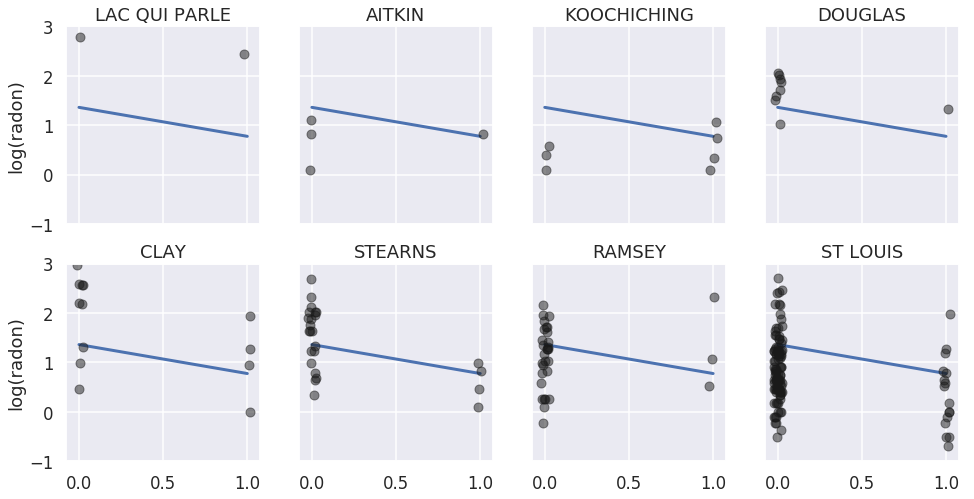

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharex='all', sharey='all', figsize=(16, 8))

plt.sca(axes[0, 0])
county_name = 'LAC QUI PARLE'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[0, 1])
county_name = 'AITKIN'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 2])
county_name = 'KOOCHICHING'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 3])
county_name = 'DOUGLAS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 0])
county_name = 'CLAY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[1, 1])
county_name = 'STEARNS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 2])
county_name = 'RAMSEY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 3])
county_name = 'ST LOUIS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
plot_county_lm(global_lm, county_name)
plot_county_data(X_county, y_county)


# No Pooling Linear Regression
Fit a separate model per cluster.

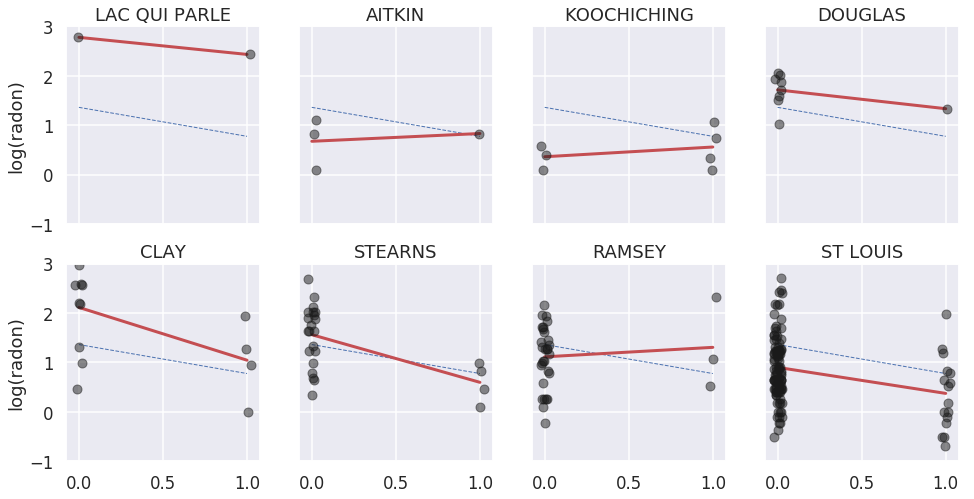

In [277]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharex='all', sharey='all', figsize=(16, 8))

plt.sca(axes[0, 0])
county_name = 'LAC QUI PARLE'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[0, 1])
county_name = 'AITKIN'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)

plt.sca(axes[0, 2])
county_name = 'KOOCHICHING'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)

plt.sca(axes[0, 3])
county_name = 'DOUGLAS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)

plt.sca(axes[1, 0])
county_name = 'CLAY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[1, 1])
county_name = 'STEARNS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)

plt.sca(axes[1, 2])
county_name = 'RAMSEY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)

plt.sca(axes[1, 3])
county_name = 'ST LOUIS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r-')
plot_county_data(X_county, y_county)


 # Linear Mixed Effects Modelling with Random Intercept
 
 Use mixed-effects modelling to model a random intercept for each cluster but learning the slope globally.

In [193]:
import statsmodels.formula.api as smf

In [220]:
X = df[['floor']]
y = df['log_radon']

In [207]:
md = smf.mixedlm("log_radon ~ floor", df, groups=df['county'])
mdf = md.fit()

In [214]:
mdf.params

Intercept    1.492393
floor       -0.662889
Group Var    0.188858
dtype: float64

In [217]:
mdf.random_effects['AITKIN']['Group']

-0.26325445605197434

In [266]:
def plot_county_lme(lme, county_name, linestyle='g-', linewidth=3):
    # Create the line
    xx = np.linspace(0, 1, 100)
    yy = lme.params['Intercept'] + lme.params['floor'] * xx + lme.random_effects[county_name]['Group']
    plt.plot(xx, yy, linestyle, linewidth=linewidth)
    plt.ylim([-1, 3])
    plt.title(county_name)
    plt.grid(True)

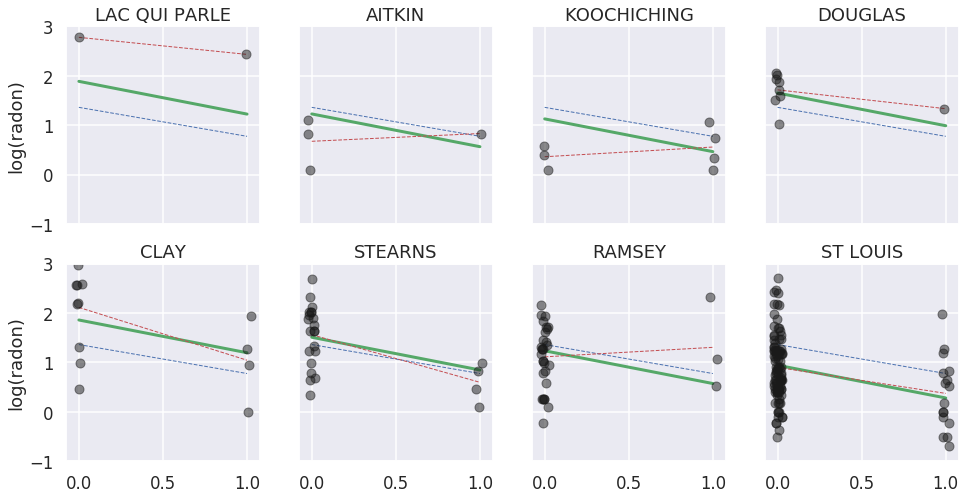

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharex='all', sharey='all', figsize=(16, 8))

plt.sca(axes[0, 0])
county_name = 'LAC QUI PARLE'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[0, 1])
county_name = 'AITKIN'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 2])
county_name = 'KOOCHICHING'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 3])
county_name = 'DOUGLAS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 0])
county_name = 'CLAY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[1, 1])
county_name = 'STEARNS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 2])
county_name = 'RAMSEY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 3])
county_name = 'ST LOUIS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_lme(mdf, county_name)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)


# Linear Mixed Effects Modelling with Random Slope

In [260]:
md_rs = smf.mixedlm("log_radon ~ floor", df, groups=df['county'], re_formula="~floor")
mdf_rs = md_rs.fit()

In [261]:
mdf_rs.random_effects['AITKIN']

Group   -0.312709
floor    0.142517
dtype: float64

In [268]:
def plot_county_random_slope(lme, county_name, linestyle='m-', linewidth=3):
    # Create the line
    xx = np.linspace(0, 1, 100)
    yy = lme.params['Intercept'] + lme.params['floor'] * xx + lme.random_effects[county_name]['Group'] + lme.random_effects[county_name]['floor'] * xx
    plt.plot(xx, yy, linestyle, linewidth=linewidth)
    plt.ylim([-1, 3])
    plt.title(county_name)
    plt.grid(True)

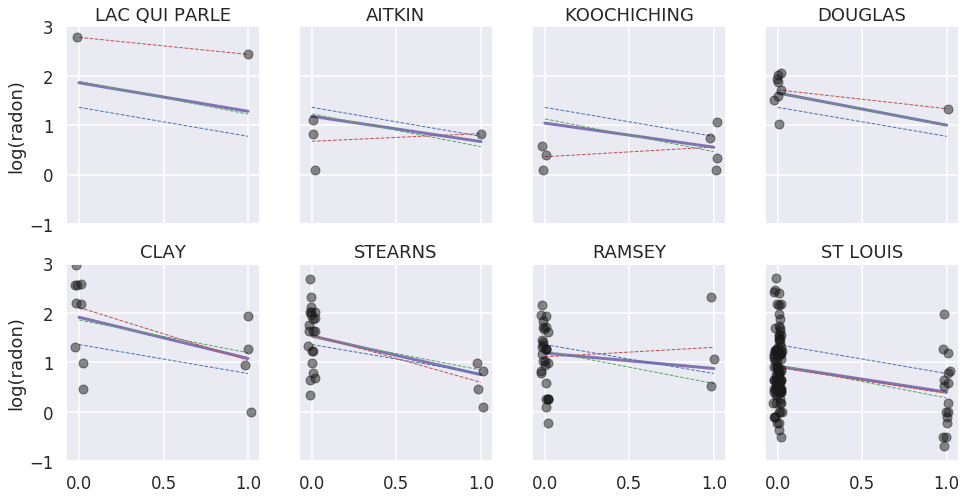

In [279]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharex='all', sharey='all', figsize=(16, 8))

plt.sca(axes[0, 0])
county_name = 'LAC QUI PARLE'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[0, 1])
county_name = 'AITKIN'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 2])
county_name = 'KOOCHICHING'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[0, 3])
county_name = 'DOUGLAS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 0])
county_name = 'CLAY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)
plt.ylabel('log(radon)')

plt.sca(axes[1, 1])
county_name = 'STEARNS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 2])
county_name = 'RAMSEY'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)

plt.sca(axes[1, 3])
county_name = 'ST LOUIS'
county_mask = (clusters == county_name)
X_county = X[county_mask]
y_county = y[county_mask]
lm.fit(X_county, y_county)
plot_county_random_slope(mdf_rs, county_name)
plot_county_lme(mdf, county_name, 'g--', 1)
plot_county_lm(global_lm, county_name, 'b--', 1)
plot_county_lm(lm, county_name, 'r--', 1)
plot_county_data(X_county, y_county)